In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import seaborn as sns

In [4]:
data = pd.read_parquet('results/embeds.train.parquet').sample(n=1000)
display(len(data))
data.head()

1000

,text,label,span,embeds
idx,,,,
33dc51a4-d0bb-445e-a670-778d96dbdd2d,"Auch die Münchner haben sich entschieden, Behe...",web1,"[118, 123]","[-1.1878247, 0.585525, -0.59597915, -0.7348418..."
fcbcd0a7-302d-4c1e-b057-aef83d660004,"Lieferung des Kopfschutzes erfolgt ohne Maske,...",web2,"[40, 45]","[-0.91677463, 0.45829335, -0.238543, 0.2480164..."
149b02c9-2e06-4e53-9ecd-aec34ba2c9f0,Im Regio-Zug München-Nürnberg kann man künftig...,web2,"[52, 57]","[-0.8595629, 0.93591577, -0.090617135, 0.19680..."
42248c76-e5e4-4459-88ae-cd21745762bf,Ackermenning bekannt und geeignet für Menschen...,web2,"[77, 82]","[-0.3824194, -0.118583485, 1.0014968, -0.42791..."
209d06de-e753-40fe-8da3-c12a79dc55ee,Mit der letzten Übung (Maske abnehmen und wied...,web2,"[23, 28]","[-1.3326019, 0.31482968, -0.030082703, -0.2717..."


In [5]:
embeds = PCA(n_components=2).fit_transform(np.stack(data.embeds.tolist()))

In [7]:
data[['x', 'y']] = [(emb[0], emb[1]) for emb in embeds]
data.head()

,text,label,span,embeds,x,y
idx,,,,,,
33dc51a4-d0bb-445e-a670-778d96dbdd2d,"Auch die Münchner haben sich entschieden, Behe...",web1,"[118, 123]","[-1.1878247, 0.585525, -0.59597915, -0.7348418...",-0.178612,1.845531
fcbcd0a7-302d-4c1e-b057-aef83d660004,"Lieferung des Kopfschutzes erfolgt ohne Maske,...",web2,"[40, 45]","[-0.91677463, 0.45829335, -0.238543, 0.2480164...",-2.916850,-2.368217
149b02c9-2e06-4e53-9ecd-aec34ba2c9f0,Im Regio-Zug München-Nürnberg kann man künftig...,web2,"[52, 57]","[-0.8595629, 0.93591577, -0.090617135, 0.19680...",-2.024349,-2.364949
42248c76-e5e4-4459-88ae-cd21745762bf,Ackermenning bekannt und geeignet für Menschen...,web2,"[77, 82]","[-0.3824194, -0.118583485, 1.0014968, -0.42791...",-1.858093,-2.587729
209d06de-e753-40fe-8da3-c12a79dc55ee,Mit der letzten Übung (Maske abnehmen und wied...,web2,"[23, 28]","[-1.3326019, 0.31482968, -0.030082703, -0.2717...",-1.462053,-0.421948


<Axes: xlabel='x', ylabel='y'>

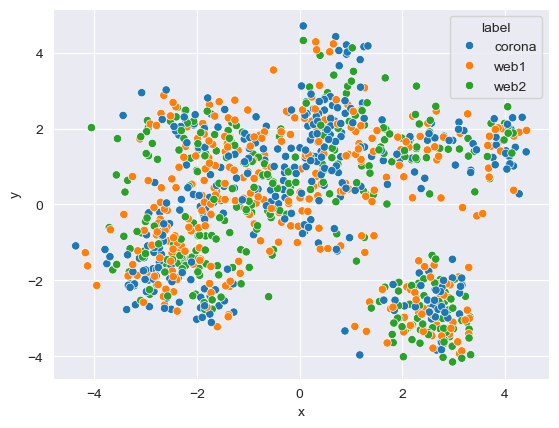

In [8]:
sns.scatterplot(data, x='x', y='y', hue='label')

/Users/simon/opt/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


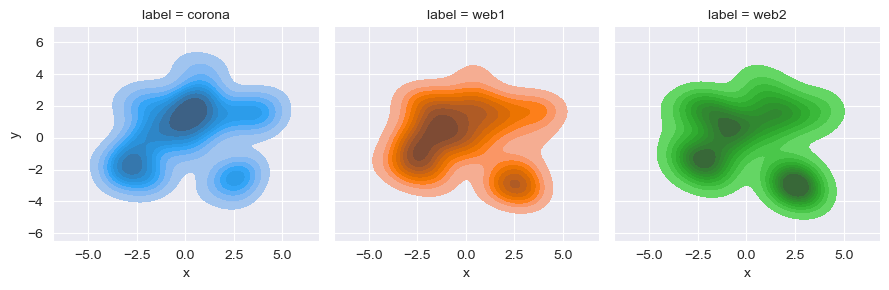

In [9]:
grid = sns.FacetGrid(data, col="label", hue="label", col_wrap=3)
grid.map_dataframe(sns.kdeplot, x='x', y='y', fill=True)